<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#4d7db8>
Sharif University of Technology - Department of Electrical Engineering
</font>
<p></p>
<font color=#4d7db8>
Introduction To Machine Learning - Dr. Sajjad Amini
</font>
<br/>
<br/>
Spring Semester 1401-02

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Project - 3rd Phase
<br />
Image Denoising using Autoencoder and PCA
			</font>
    <br/>
<font size=4>
			<br/><br/>
Due on Tir 10th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=green>
Should you have any questions concerning the project, please feel free to ask via Telegram.
     </font>
</font>
                <br/>
    </div>

# Personal Info
<hr/>
    <div class="column" align=center>
    <font size=4>
        <div class="column">
        <br />
            student_number = 99105901
            <br />
            Name = Amirhossein
            <br />
            Last_Name = Akbari
        </div>
        <div class="column">
        <br />
            student_number = 99106255
            <br />
            Name = Alireza  
            <br />
            Last_Name = Shokrani
        </div>
    </font>
    </div>


1. Download the MNIST dataset and create a dataloader that adds gaussian noise to the input images.
2. Design and train an AutoEncoder on the MNIST dataset to denoise the noisy images.
3. Visualize original images, their corresponding noisy images and their reconstructed versions side by side.
4. Repeat the previous steps using PCA algorithm.

# Import Necessary Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Load Dataset and Prepare It

In [19]:
# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Download and load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

# Create data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

std_dev = 0.3


# Define Your Model
torch neural network model

In [3]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        decoded = decoded.view(decoded.size(0), 1, 28, 28)
        return encoded, decoded

# Create an instance of the Autoencoder model
autoencoder = Autoencoder()


# Fit The Model
Also Define optimizer, Criterion and other parameters 

In [4]:
# Define the optimizer, criterion, and other parameters
lr = 0.001
num_epochs = 10
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=lr)

# Training loop
for epoch in range(num_epochs):
    for batch_idx, (data, _) in enumerate(train_loader):
        # Add Gaussian noise to the input images
        noisy_data = data + torch.randn(data.size()) * std_dev

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        _, output = autoencoder(noisy_data)

        # Calculate the loss
        loss = criterion(output, data)

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

        # Print the progress
        if (batch_idx + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, batch_idx + 1, len(train_loader), loss.item()))


Epoch [1/10], Step [100/938], Loss: 0.0717
Epoch [1/10], Step [200/938], Loss: 0.0442
Epoch [1/10], Step [300/938], Loss: 0.0356
Epoch [1/10], Step [400/938], Loss: 0.0341
Epoch [1/10], Step [500/938], Loss: 0.0285
Epoch [1/10], Step [600/938], Loss: 0.0233
Epoch [1/10], Step [700/938], Loss: 0.0236
Epoch [1/10], Step [800/938], Loss: 0.0206
Epoch [1/10], Step [900/938], Loss: 0.0187
Epoch [2/10], Step [100/938], Loss: 0.0195
Epoch [2/10], Step [200/938], Loss: 0.0179
Epoch [2/10], Step [300/938], Loss: 0.0181
Epoch [2/10], Step [400/938], Loss: 0.0179
Epoch [2/10], Step [500/938], Loss: 0.0159
Epoch [2/10], Step [600/938], Loss: 0.0153
Epoch [2/10], Step [700/938], Loss: 0.0158
Epoch [2/10], Step [800/938], Loss: 0.0127
Epoch [2/10], Step [900/938], Loss: 0.0130
Epoch [3/10], Step [100/938], Loss: 0.0125
Epoch [3/10], Step [200/938], Loss: 0.0120
Epoch [3/10], Step [300/938], Loss: 0.0156
Epoch [3/10], Step [400/938], Loss: 0.0124
Epoch [3/10], Step [500/938], Loss: 0.0138
Epoch [3/10

# Plot The Results

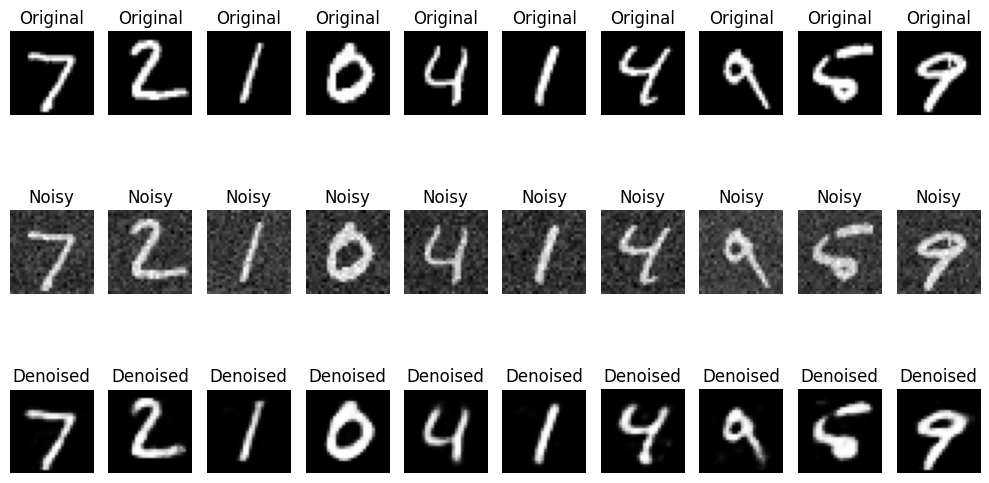

In [6]:
# Visualize original images, noisy images, and reconstructed images
num_images = 10
images, _ = next(iter(test_loader))
noisy_images = images + torch.randn(images.size()) * std_dev
encoded_images, denoised_images = autoencoder(noisy_images)

# Convert images to numpy arrays
images = images.numpy()
noisy_images = noisy_images.numpy()
denoised_images = denoised_images.detach().numpy()

# Plot the images
fig, axes = plt.subplots(nrows=3, ncols=num_images, figsize=(10, 6))

for i in range(num_images):
    axes[0, i].imshow(np.squeeze(images[i]), cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    axes[1, i].imshow(np.squeeze(noisy_images[i]), cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title('Noisy')

    axes[2, i].imshow(np.squeeze(denoised_images[i]), cmap='gray')
    axes[2, i].axis('off')
    axes[2, i].set_title('Denoised')

plt.tight_layout()
plt.show()


# PCA

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Download and load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

# Add Gaussian noise to the dataset
def add_gaussian_noise(image, std_dev):
    noisy_image = image + torch.randn(image.size()) * std_dev
    return torch.clamp(noisy_image, 0., 1.)

# Create a separate noisy dataset for visualization
noisy_test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)
noisy_test_dataset.data = add_gaussian_noise(noisy_test_dataset.data.float() / 255., std_dev) * 255.

# Flatten the images
flatten_images = train_dataset.data.reshape(train_dataset.data.shape[0], -1).numpy()


# Perform PCA with increased number of components
num_components = 478  # Increase the number of components
pca = PCA(n_components=num_components)
pca_images = pca.fit_transform(flatten_images)

# Reconstruct the images
reconstructed_images = pca.inverse_transform(pca.transform(noisy_test_dataset.data.reshape(train_dataset.data.shape[0], -1)))

# Reshape the images
reconstructed_images = reconstructed_images.reshape(-1, 1, 28, 28)

# Visualize original images, noisy images, and reconstructed images
num_images = 10
original_images = test_dataset.data[:num_images].numpy()
noisy_images = noisy_test_dataset.data[:num_images].numpy()
reconstructed_images = reconstructed_images[:num_images]

fig, axes = plt.subplots(nrows=3, ncols=num_images, figsize=(12, 6))

for i in range(num_images):
    axes[0, i].imshow(np.squeeze(original_images[i]), cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    axes[1, i].imshow(np.squeeze(noisy_images[i]), cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title('Noisy')

    axes[2, i].imshow(np.squeeze(reconstructed_images[i]), cmap='gray')
    axes[2, i].axis('off')
    axes[2, i].set_title('Reconstructed')

plt.tight_layout()
plt.show()


RuntimeError: shape '[60000, -1]' is invalid for input of size 7840000